### 목표
- 독버섯과 식용버섯을 분리하는 tree모델 만들기
- tree 모델 시각화
- tree 모델의 특성 중요도 확인

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/mushroom.csv")
display(data.shape)
display(data.head())

(8124, 23)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# 문제와 정답분리
X = data.iloc[:,1:]
y = data.iloc[:,0] # 독/식용 컬럼

In [4]:
# 원학 인코딩 : 글자데이터 -> 숫자데이터
X_one_hot = pd.get_dummies(X)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# 훈련데이터 평가데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_one_hot,y,random_state=926)

In [6]:
# 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
pre = tree.predict(X_test)


In [7]:
# 모델평가 -> 분류의 평가지표 사용 : 정확도
from sklearn.metrics import accuracy_score


In [8]:
accuracy_score(y_test, pre)

1.0

In [9]:
# 트리의 특성 중요도 확인
df = pd.DataFrame([X_train.columns,
                  tree.feature_importances_]).T
df.sort_values(by=1,ascending=False)

,0,1
27,odor_n,0.619564
53,stalk-root_c,0.166668
55,stalk-root_r,0.09185
100,spore-print-color_r,0.034424
25,odor_l,0.024065
...,...,...
38,gill-color_e,0.0
37,gill-color_b,0.0
35,gill-size_b,0.0
34,gill-spacing_w,0.0


In [10]:
# tree 시각화 - 파이썬 wrapper 라이브러리 설치
!pip install graphviz

#### 윈도우용 grapviz패키지 설치하기
- https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/

In [14]:
# path 설정
import os
os.environ['PATH'] += os.pathsep + 'C:/\Program Files/Graphviz/bin'

In [15]:
# tree 모델을 그림으로 저장
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, # 저장할 tree 모델 객체
                out_file = "tree.dot", # 저장할 파일명
                class_names=['독','식용'], # 클래스 이름 설정
                feature_names=X_train.columns, # 컬럼 이름 넣어주기
                impurity=True, # 불순도 표기 여부
                filled=True, # 색상 채우기 여부
                rounded=True
               )

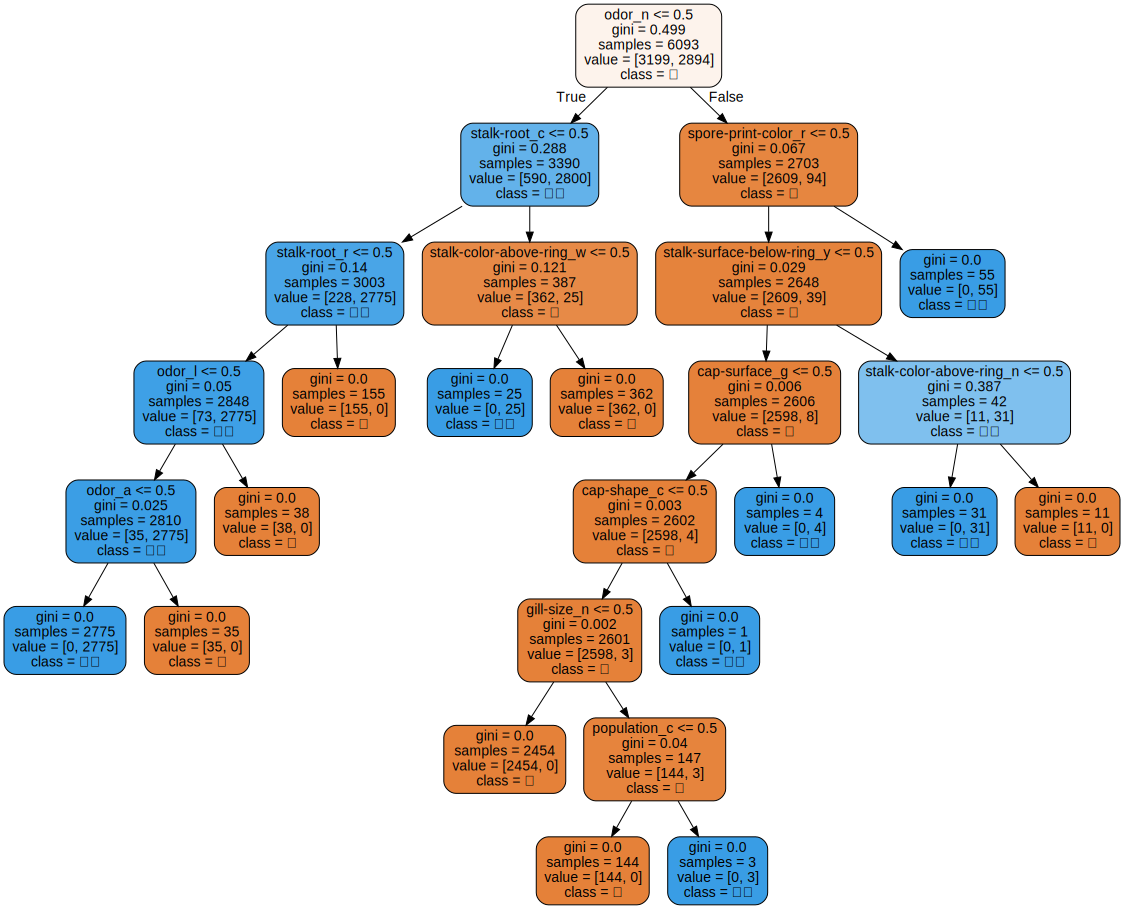

In [16]:
# 그림 파일을 불러와서 시각화
with open('./tree.dot', encoding='UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))